In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv(r'C:\Users\sayye\OneDrive\Desktop\Project 6\rossmann-store-sales\train.csv', low_memory=False)
store_df = pd.read_csv(r'C:\Users\sayye\OneDrive\Desktop\Project 6\rossmann-store-sales\store.csv', low_memory=False)

In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
train_df.drop_duplicates(inplace=True)
store_df.drop_duplicates(inplace=True)

In [10]:
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].median())
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median())
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].median())
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].median())
store_df['PromoInterval'] = store_df['PromoInterval'].fillna("Unknown")

In [11]:
num_col_train=train_df.select_dtypes(include=['int64','float64']).columns
Q1_train=train_df[num_col_train].quantile(0.25)
Q3_train=train_df[num_col_train].quantile(0.75)
IQR_train=Q3_train - Q1_train

In [12]:
outliers_train = ((train_df[num_col_train] < (Q1_train - 1.5 * IQR_train)) | 
                    (train_df[num_col_train] > (Q3_train + 1.5 * IQR_train))).sum()

In [13]:
for col in num_col_train:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = train_df[col].median()
    
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [14]:
cat_col_train = train_df.select_dtypes(include=['object']).columns
cat_col_store = store_df.select_dtypes(include=['object']).columns

In [15]:
cat_col_train

Index(['Date', 'StateHoliday'], dtype='object')

In [16]:
cat_col_store

Index(['StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_col_train:
    if col != 'Date':
        train_df[col] = le.fit_transform(train_df[col])

for col in cat_col_store:
    store_df[col] = le.fit_transform(store_df[col])

In [18]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,0.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,0.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,0.0
3,4,5,2015-07-31,13995.0,609.0,1.0,1,0,0.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0.0,1.0,0,1,0.0
1017205,1112,2,2013-01-01,0.0,0.0,1.0,0,1,0.0
1017206,1113,2,2013-01-01,0.0,0.0,1.0,0,1,0.0
1017207,1114,2,2013-01-01,0.0,0.0,1.0,0,1,0.0


In [19]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,22.0,2012.0,3
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1
3,4,2,2,620.0,9.0,2009.0,0,22.0,2012.0,3
4,5,0,0,29910.0,4.0,2015.0,0,22.0,2012.0,3
...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,1
1111,1112,2,2,1880.0,4.0,2006.0,0,22.0,2012.0,3
1112,1113,0,2,9260.0,8.0,2010.0,0,22.0,2012.0,3
1113,1114,0,2,870.0,8.0,2010.0,0,22.0,2012.0,3


In [20]:
train_df['Year'] = pd.to_datetime(train_df['Date']).dt.year
train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month
train_df['DayOfWeek'] = pd.to_datetime(train_df['Date']).dt.dayofweek
train_df['DayOfMonth'] = pd.to_datetime(train_df['Date']).dt.day

Creating new features based on existing ones

In [21]:
train_df['AvgSalesPerCustomer'] = train_df['Sales'] / train_df['Customers']
train_df['AvgSalesPerDay'] = train_df.groupby('Date')['Sales'].transform('mean')

Merging train data with store data

In [22]:
merged_df = pd.merge(train_df, store_df, on='Store')

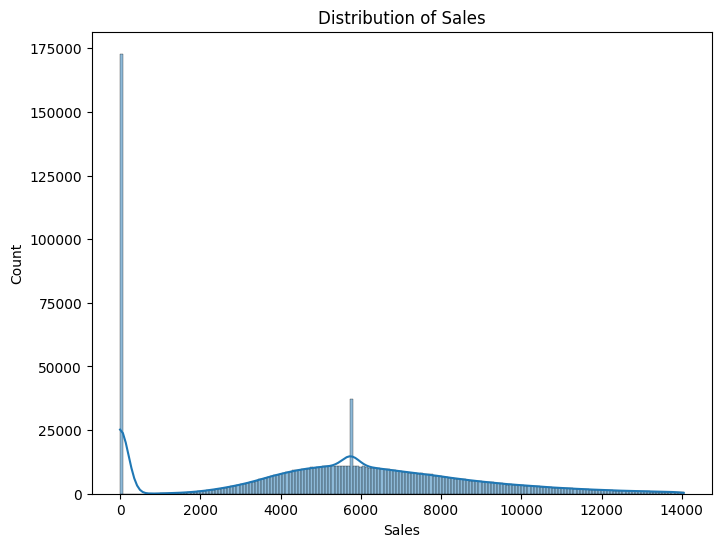

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

- Peaks at Specific Values: Noticeable peaks occur at $4,000, $6,000, and $8,000, indicating these sales values are more common.

- High Frequency at $6,000: Over 25,000 transactions occur at the $6,000 mark, making it a significant sales value.

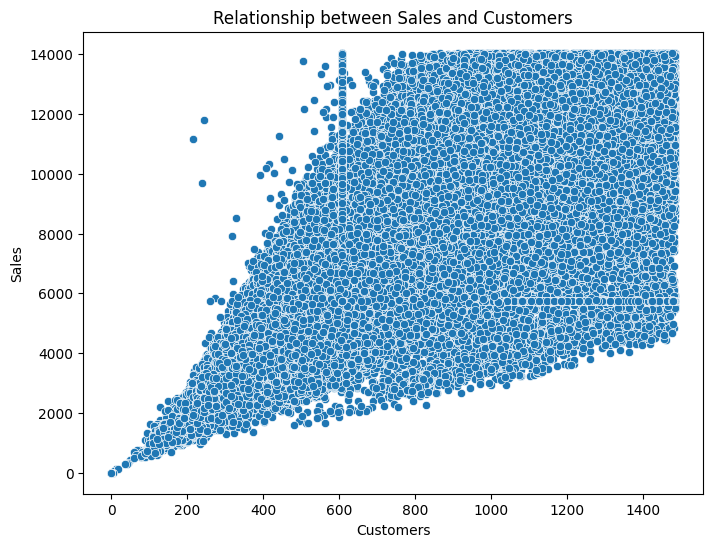

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Customers', y='Sales', data=merged_df)
plt.title('Relationship between Sales and Customers')
plt.show()

- Zero customers correspond to zero sales.
- As customer numbers grow, sales gradually increase.

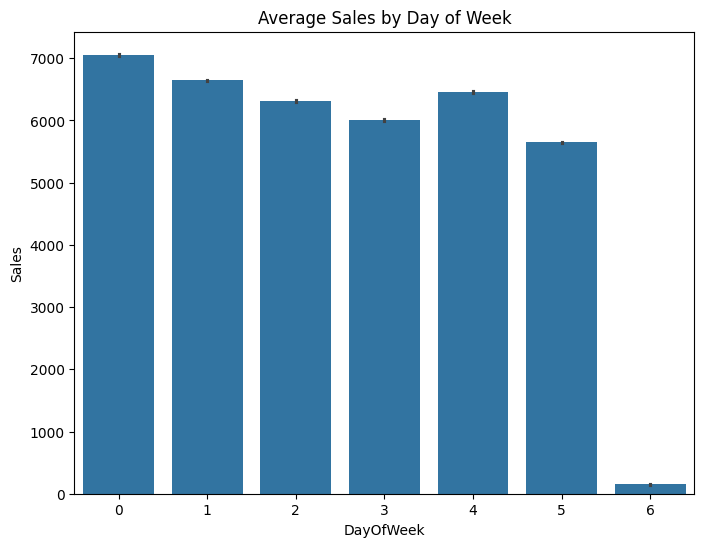

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='DayOfWeek', y='Sales', data=merged_df)
plt.title('Average Sales by Day of Week')
plt.show()

- Day 0: Highest average sales, reaching approximately $7,000.
- Day 1 to Day 3: Average sales decrease gradually.
- Day 4: Average sales increase, surpassing Day 2's level.
- Day 5: Average sales decrease again.
- Day 6: Lowest average sales.

StoreType
0    5391.371550
1    7465.965193
2    5487.990281
3    5509.055306
Name: Sales, dtype: float64


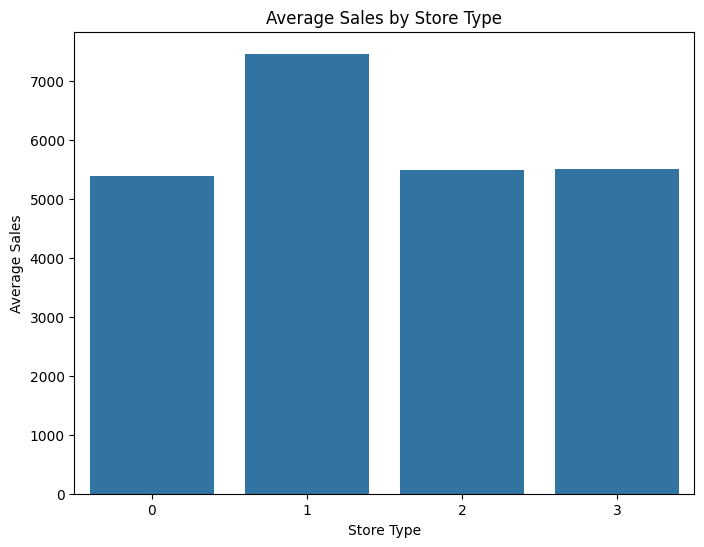

In [26]:
store_type_sales = merged_df.groupby('StoreType')['Sales'].mean()
print(store_type_sales)

plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

- Store Type 0: Lowest average sales.
- Store Type 1: Highest average sales, exceeding $7,000.
- Store Type 2: Slightly higher average sales than Store Type 0.
- Store Type 2 and 3: Similar average sales, tied at the same level.

Month
1     545225420.0
2     508003411.0
3     567742396.0
4     545480041.0
5     542667922.0
6     546577995.0
7     567834900.0
8     347008602.0
9     328342936.0
10    338726289.0
11    351571286.0
12    377857249.0
Name: Sales, dtype: float64


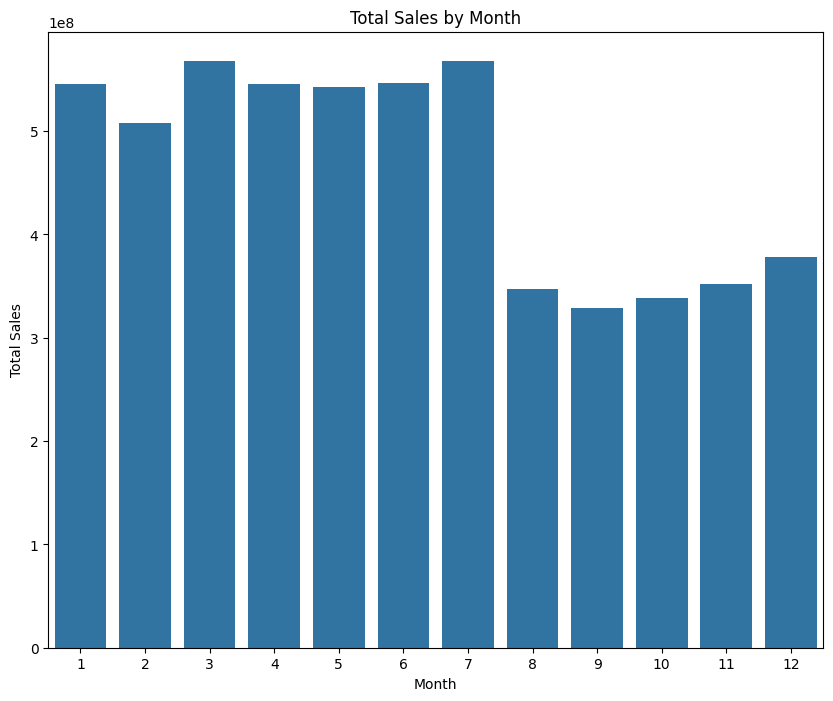

In [27]:
monthly_sales = merged_df.groupby('Month')['Sales'].sum()
print(monthly_sales)

plt.figure(figsize=(10, 8))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

- January records the highest total sales.
- February experiences a decline.
- March shows an increase.
- April decreases.
- May decreases further.
- June exhibits a slight upturn.
- July parallels April's performance.
- August hits the lowest point.
- September dips below August.
- October displays a modest recovery.
- November and December demonstrate a gradual sales improvement.

In [28]:
test_df = pd.read_csv(r'C:\Users\sayye\OneDrive\Desktop\Project 6\rossmann-store-sales\test.csv', low_memory=False)

In [29]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [30]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Handling missing values

In [31]:
test_df['Open'] = test_df['Open'].fillna(0)

Encoding categorical variables

In [32]:
cat_col_test = test_df.select_dtypes(include=['object']).columns
for col in cat_col_test:
    if col != 'Date':
        test_df[col] = le.fit_transform(test_df[col])

Extracting date features

In [33]:
test_df['Year'] = pd.to_datetime(test_df['Date']).dt.year
test_df['Month'] = pd.to_datetime(test_df['Date']).dt.month
test_df['DayOfMonth'] = pd.to_datetime(test_df['Date']).dt.day

Merging test data with store data

In [34]:
test_merged_df = pd.merge(test_df, store_df, on='Store')

In [35]:
test_merged_df.isnull().sum()

Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                          0
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
Year                          0
Month                         0
DayOfMonth                    0
StoreType                     0
Assortment                    0
CompetitionDistance          96
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
dtype: int64

In [36]:
test_merged_df['CompetitionDistance'] = test_merged_df['CompetitionDistance'].fillna(test_merged_df['CompetitionDistance'].mean())

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_merged_df[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = scaler.fit_transform(test_merged_df[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])

In [38]:
test_merged_df.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
DayOfMonth                   0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17,2,0,-0.529113,0.633580,-0.208737,0,22.0,2012.0,3
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,17,0,0,1.252802,1.816017,-0.573389,1,14.0,2011.0,1
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,17,0,2,2.620416,-1.337148,0.702891,0,22.0,2012.0,3
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,17,0,0,0.336903,1.027725,0.885217,0,22.0,2012.0,3
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,17,0,2,-0.423805,0.239434,-1.667343,0,22.0,2012.0,3


Modelling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = test_merged_df.drop(['Id'], axis=1)
y = test_merged_df['Id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Date column to datetime objects and extract year, month, and day
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day

X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day

# Drop Date column
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [41]:
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"LightGBM: MSE = {mse:.2f}, R2 = {r2:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 32870, number of used features: 15
[LightGBM] [Info] Start training from score 20552.004837
LightGBM: MSE = 96113797.80, R2 = 0.33


In [42]:
feature_names = preprocessor.get_feature_names_out()
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Feature'] = importance_df['Feature'].str.replace('num__', '')
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10))

                      Feature  Importance
8         CompetitionDistance         574
0                       Store         569
10   CompetitionOpenSinceYear         289
12            Promo2SinceWeek         284
1                   DayOfWeek         241
9   CompetitionOpenSinceMonth         206
13            Promo2SinceYear         199
5               SchoolHoliday         186
6                   StoreType         128
14              PromoInterval          87


1. CompetitionDistance is the most important feature, which makes sense since it directly affects the store's sales.
2. Store is the second most important feature, which could be due to differences in store locations, sizes, or management.
3. CompetitionOpenSinceYear and CompetitionOpenSinceMonth are also important, indicating that the timing of competition openings affects sales.
4. Promo2SinceWeek and Promo2SinceYear suggest that promotions have a significant impact on sales.
5. DayOfWeek and SchoolHoliday are less important but still relevant, indicating that sales vary by day of the week and during school holidays.

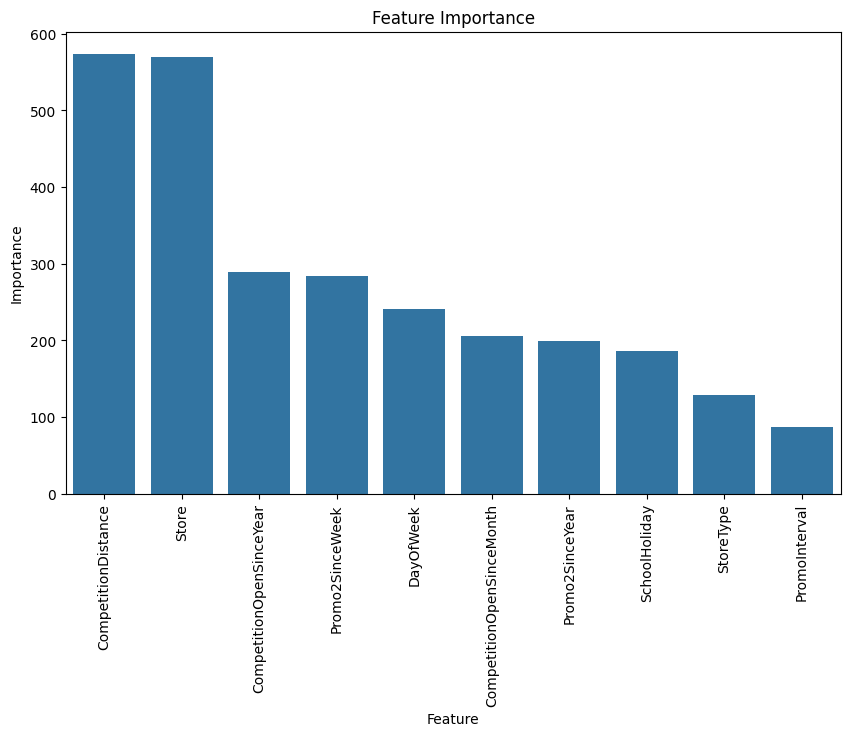

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Importance', data=importance_df.head(10))
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'rossmann_model.joblib')

['rossmann_model.joblib']

In [51]:
import pandas as pd
from flask import Flask, jsonify, request
import joblib
import os

os.environ['FLASK_ENV'] = 'development'

app = Flask(__name__)

with open('rossmann_model.joblib', 'rb') as f:
    model = joblib.load(f)

def predict(data):
    df = pd.DataFrame(data)
    predictions = model.predict(df)
    return predictions.tolist()

@app.route('/predict', methods=['POST'])
def predict_endpoint():
    
    data = request.get_json()
    predictions = predict(data)
    return jsonify({'predictions': predictions})

if __name__ == '__main__':
    app.run(port=5001, debug=False, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
